# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from warnings import filterwarnings
import warnings

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')



import seaborn as sns

# 차트 스타일지정     글꼴                    음수처리                        눈금
#sns.set(font = 'malgun ghthic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
sns.set(font = 'D2coding', rc = {'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

# 데이터 로딩

In [2]:
data = pd.read_csv('spam.csv')
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 탐색적 데이터 분석 : EDA

## target : 목표변소 or 변속변수

In [3]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

- spam : 스펨 문자
- ham : 스팸이 아닌 문자
- NLTK(Nstural Language Toolkit) : 자연어 처리를 위해 만든 도구(패키지)
- 주요기능 :
   1. 말몽치, 
   2. 토큰 생성
   3. 형태소 분석
   4. 품사 태깅

In [4]:
data['target'].value_counts()

ham     4827
spam     747
Name: target, dtype: int64

## 말몽치(corpus)
- 자연어 분석을 위해 만든 샘플 문서 집합

In [5]:
import nltk 
#nltk.download('book', quiet=True)

from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
# gutenberg 말몽치 : 저작권이 만료된 소설같은 작품들을 가지고 있는 문서 집합
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
# raw = 원본 
shakespeare = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

In [8]:
print(shakespeare[:1000])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not a Mouse stirring

   Barn. Well, goodnight. If you do meet Horatio and
Marcellus, the Riuals of my Watch, bid them make hast.
Enter Horatio and Marcellus.

  Fran. I thinke I heare them. Stand: who's there?
  Hor. Friends to this ground

   Mar. And Leige-men to the Dane

   Fran. Giue you good night

   Mar. O farwel honest Soldier, who hath relieu'd you?
  Fra. Barnardo ha's my place: giue you goodnight.

Exit Fran.

  Mar. Holla Barnardo

   Bar. Say, what is Horatio there?
  Hor. A peece of

# 토큰 생성 : 문자열을 가장 작은 단위인 토큰으로 나누는 작업

In [9]:
from nltk.tokenize import sent_tokenize

print(sent_tokenize(shakespeare[:1000]))

['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Barnardo and Francisco two Centinels.', 'Barnardo.', "Who's there?", 'Fran.', 'Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar.', 'Long liue the King\n\n   Fran.', 'Barnardo?', 'Bar.', 'He\n\n   Fran.', 'You come most carefully vpon your houre\n\n   Bar.', "'Tis now strook twelue, get thee to bed Francisco\n\n   Fran.", "For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn.", 'Haue you had quiet Guard?', 'Fran.', 'Not a Mouse stirring\n\n   Barn.', 'Well, goodnight.', 'If you do meet Horatio and\nMarcellus, the Riuals of my Watch, bid them make hast.', 'Enter Horatio and Marcellus.', 'Fran.', 'I thinke I heare them.', "Stand: who's there?", 'Hor.', 'Friends to this ground\n\n   Mar.', 'And Leige-men to the Dane\n\n   Fran.', 'Giue you good night\n\n   Mar.', "O farwel honest Soldier, who hath relieu'd you?", 'Fra.', "Barnardo ha's my place: giue you go

In [10]:
# 단어 단위로 나눔
from nltk.tokenize import word_tokenize
print(word_tokenize(shakespeare[50:100]))

['9', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'a']


In [11]:
# 정규 표현식
from nltk.tokenize import RegexpTokenizer


re = RegexpTokenizer('[\w]+')
re.tokenize(shakespeare[50:100])

# \w : 영문자, 숫자, _언드바를 찾아줌
# + 단어단위

['9', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'a']

## 형태소 (morpheme) 분석

- 형태소 : 의미가 있는 가장 작은 말의 단위
- 형태소 분석 : 단어에서 어근, 접두사, 접미사, 품사 같은 속성을 파악하는 작업
- 기능
   1. 어간 추출( stemming ) : 단어의 기본형 찾아 냄
   2. 원형 복원( lemmatizing ) : 같은 의미를 가진 여러 단어가 있다면 사전적으로 통일 시킴
   3. 품사 부착( Part-Of-Speech tagging, POS ) ( 동, 형, 명사 ) 구분

### 어간 추출

In [12]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()    # PorterStemmer 방식
st2 = LancasterStemmer() # LancasterStemmer 방식

words = ['fly', 'flies', 'flying', 'flew', 'flown']

# list 내포

print('Porter Stemmer : ', [st1.stem(w) for w in words])
print('LancasterStemmer : ', [st2.stem(w) for w in words])

Porter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


### 원형 복원( lemmatizing )
- 같은 의미를 가진 여러 단어가 있다면 사전적으로 통일 시킴

In [13]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

#          pos = 내가 포관할 품사
[lm.lemmatize(w, pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [14]:
nltk.help.upenn_tagset('VB') # 동사 VB가 뭐냐?

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [15]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [16]:
shakespeare = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [17]:
from nltk.tag import pos_tag

text = '''Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence'''

tag_list = pos_tag(word_tokenize(text))
tag_list # 각각의 단어와 가각의 품사가 튜플형태로 묶어서 나옴

# NNP 고유명사
# NN 명사
# CC 
# JJ
# DT 
# VBD 시제동사
# IN 전치사
# DT 관사
# NNS 명사 복수


[('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN')]

In [18]:
# 명사만 가져 오기
nouns_list = [t[0] for  t in tag_list if t[1] == 'NN']
nouns_list

['handsome', 'clever', 'home', 'disposition', 'existence']

## 전처리

In [19]:
data = pd.read_csv('spam.csv')
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 특수 문자(특수기호) 제거

In [20]:
# python에 내장된 패키지 string는 문자열을 처리하는 다양한 함수를 제공한다.
import string

In [21]:
# 특수기호 목록을 출려 확인

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
sample = data['text'].loc[0]
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [23]:
for i in sample :
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [24]:
#클러링

# def set_punc(x): 
#     String = ''
#     for i in x :
#         if i not in string.punctuation :
#             String += i
#     return String

# data['text'] = data['text'].apply(lambda x : set_punc())

# data.head()

# chipo.item_price = chipo.item_price.apply(lambda x : x[1:]).astype(float)

In [25]:
# 문장형태
new_sample=[]
for i in sample :
    if i not in string.punctuation:
        new_sample.append(i)
new_sample = ''.join(new_sample)
new_sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [26]:
def remove_punc(x):
    new_sample=[]
    for i in x :
        if i not in string.punctuation:
            new_sample.append(i)
    new_sample = ''.join(new_sample)
    return new_sample

data['text'] = data['text'].apply(remove_punc)

In [27]:
data.head()

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...


## 전처리 - 불용어(stopword)
- 불용어 : 자연어 분석을 할 때 분석에 의미가 없는 단어
- 불용어 사전 : nltk

In [28]:
# 불용어 목록 확인
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
sample.split()

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...']

In [31]:
for w in sample.split() :
    if w.lower() not in stopwords.words('english') : # 불용어가 아니라면
        print(w.lower())

go
jurong
point,
crazy..
available
bugis
n
great
world
la
e
buffet...
cine
got
amore
wat...


In [32]:
new_sample = []

for w in sample.split() :
    if w.lower() not in stopwords.words('english') : # 불용어가 아니라면
        new_sample.append(w.lower())
        
new_sample = ' '.join(new_sample)
new_sample

'go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...'

In [33]:
def stop_words(x) :
    new_sample = []

    for w in x.split() :
        if w.lower() not in stopwords.words('english') : # 불용어가 아니라면
            new_sample.append(w.lower())

    new_sample = ' '.join(new_sample)
    return new_sample


In [34]:
data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u 짙750 pound prize ...
5570                          체 b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

## 전처리 - 정형화 처리(target)

In [35]:
sample = pd.Series(['a','b','c'])

# map()
# zip()

sample.map({'a' : 'apple', 'b':'banana','c' : 'candy'})

0     apple
1    banana
2     candy
dtype: object

In [36]:
data['target'] = data['target'].map({'spam':1, 'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

## 카운트 기반의 벡터화 처리
- 카운트 기반 벡터화 : 문자를 개수 기반으로 벡터화하는 방식
- 데이터 전체에 존재하는 모든 단어들을 사전처럼 모은 다음에 각각의 인덱스를 부여하고, 문장마다 있는 인덱스를 카운트 하는 방식이다.

In [37]:
'''
                                      0행 01은 2개  0행 02은 1개
brown dog white cat brown bear black dog : 0 (01 2)(02 1)  
black dog white dog 

step1. 단어분리 - 고유인덱스 부여 - 
  brown - 01
  dog   - 02
  white - 03
  black - 04
  cat   - 05
  bear  - 06
  
  
  
  
'''

'\n                                      0행 01은 2개  0행 02은 1개\nbrown dog white cat brown bear black dog : 0 (01 2)(02 1)  \nblack dog white dog \n\nstep1. 단어분리 - 고유인덱스 부여 - \n  brown - 01\n  dog   - 02\n  white - 03\n  black - 04\n  cat   - 05\n  bear  - 06\n  \n  \n  \n  \n'

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

X = data['text']
y = data['target']

cv = CountVectorizer()
cv.fit(X)

# 단어와 인덱스 출력
cv.vocabulary_ # 모델 파라미터

{'go': 3769,
 'jurong': 4671,
 'point': 6416,
 'crazy': 2471,
 'available': 1379,
 'bugis': 1848,
 'great': 3866,
 'world': 9171,
 'la': 4831,
 'buffet': 1846,
 'cine': 2186,
 'got': 3826,
 'amore': 1146,
 'wat': 8933,
 'ok': 5978,
 'lar': 4870,
 'joking': 4639,
 'wif': 9066,
 'oni': 6010,
 'free': 3555,
 'entry': 3137,
 'wkly': 9123,
 'comp': 2302,
 'win': 9080,
 'fa': 3274,
 'cup': 2527,
 'final': 3399,
 'tkts': 8366,
 '21st': 433,
 'may': 5318,
 '2005': 420,
 'text': 8201,
 '87121': 840,
 'receive': 6816,
 'questionstd': 6708,
 'txt': 8578,
 'ratetcs': 6760,
 'apply': 1232,
 '08452810075over18s': 71,
 'dun': 2988,
 'say': 7176,
 'early': 3008,
 'hor': 4200,
 'already': 1119,
 'nah': 5665,
 'dont': 2894,
 'think': 8277,
 'goes': 3783,
 'usf': 8727,
 'lives': 5033,
 'around': 1283,
 'though': 8296,
 'freemsg': 3563,
 'hey': 4095,
 'darling': 2591,
 'weeks': 8988,
 'word': 9157,
 'back': 1431,
 'id': 4321,
 'like': 4983,
 'fun': 3630,
 'still': 7843,
 'tb': 8131,
 'xxx': 9296,
 'std': 

In [39]:
X = cv.transform(X)

In [40]:
print(X)

# (0행인덱스 ,1146고유인덱스) 개수

  (0, 1146)	1
  (0, 1379)	1
  (0, 1846)	1
  (0, 1848)	1
  (0, 2186)	1
  (0, 2471)	1
  (0, 3769)	1
  (0, 3826)	1
  (0, 3866)	1
  (0, 4671)	1
  (0, 4831)	1
  (0, 6416)	1
  (0, 8933)	1
  (0, 9171)	1
  (1, 4639)	1
  (1, 4870)	1
  (1, 5978)	1
  (1, 6010)	1
  (1, 9066)	1
  (2, 71)	1
  (2, 420)	1
  (2, 433)	1
  (2, 840)	1
  (2, 1232)	1
  (2, 2302)	1
  :	:
  (5570, 3165)	1
  (5570, 3542)	1
  (5570, 3788)	1
  (5570, 4166)	1
  (5571, 5549)	1
  (5571, 6342)	1
  (5571, 7594)	1
  (5571, 7970)	1
  (5572, 964)	1
  (5572, 1632)	1
  (5572, 1883)	1
  (5572, 3080)	1
  (5572, 3555)	1
  (5572, 3679)	1
  (5572, 3928)	1
  (5572, 4321)	1
  (5572, 4458)	1
  (5572, 4983)	1
  (5572, 5760)	1
  (5572, 7619)	1
  (5572, 8717)	1
  (5572, 8983)	1
  (5573, 5671)	1
  (5573, 7036)	1
  (5573, 8524)	1


In [41]:
# 0번쨰 행의 데이터 확인
data.text[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [43]:
print(cv.vocabulary_['go'])

3769


## 모델링 및 예측/평가

## 푼련세트와 테스트세트로 분리

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## MultinomialNB : 다항 분포에 대한 나이브 베이스 알고리즘

- 정규분포( Gaussian )
- 베르투이분포( Bernoulli ) 

In [48]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

#정확도
print(accuracy_score(y_test, pred))

0.9856502242152466


In [57]:
print(confusion_matrix(y_test, pred))

[[965  12]
 [  4 134]]


<AxesSubplot:>

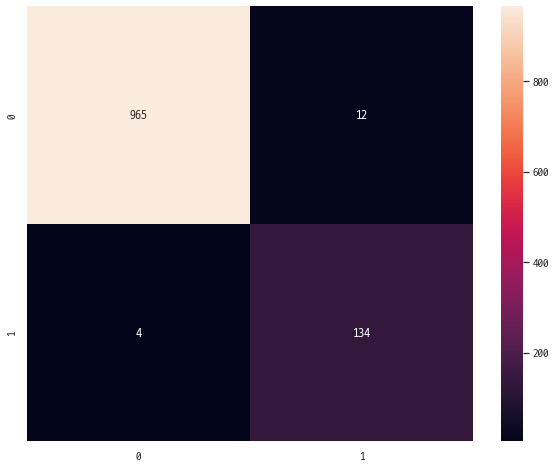

In [63]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='0.0f')